# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low= -90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#include a print log of each city as its being processed (with the city number and city name)
url = "http://api.openweathermap.org/data/2.5/weather?"

counter=0
set_num=1
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_list=[]
print("Beginning Data Retrieval")
print("-"*30)

# Loop through the cities using the target url
for city in cities:
    target_url = f"{url}appid={weather_api_key}&q={city}" 
    weather_response= requests.get(target_url)
    weather_json = weather_response.json()
    try:
        city_list.append(weather_json['name'])
        clouds.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(9/5*(weather_json['main']['temp_max']-273.15)+32)
        wind_speed.append(weather_json['wind']['speed'])

        #then print log of each city as its being processed (with the city number and city name)
        if counter>=49:
            counter=1
            set_num+=1
            #city_list.append(city)
        else:
            counter+=1
            #city_list.append(city)
        print(f"Processing Record {counter} of Set {set_num} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | mutoko
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | baykit
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | scarborough
Processing Record 8 of Set 1 | kampot
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | guaduas
Processing Record 13 of Set 1 | biharamulo
City not found. Skipping...
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | amurzet
Processing Record 16 of Set 1 | bermeo
City not found. Skipping...
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | kar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create dictionary for the info extracted from the url
city_dict={"City":city_list,
        "Cloudiness":clouds,
        "Country":country,
        "Date":date,
        "Humidity":humidity,
        "Latitude":lat,
        "Longitude":lng,
        "Max Temp":max_temp,
        "Wind Speed":wind_speed}

In [7]:
#display the dictionary as a dataframe and export as a csv
city_df=pd.DataFrame(city_dict)
city_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Latitude      559
Longitude     559
Max Temp      559
Wind Speed    559
dtype: int64

In [8]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Saskylakh,58,RU,1592502913,62,71.92,114.08,62.726,2.58
1,Mutoko,79,ZW,1592503208,84,-17.40,32.23,53.456,2.00
2,Arraial do Cabo,0,BR,1592503208,69,-22.97,-42.03,75.200,8.70
3,Baykit,63,RU,1592503158,62,61.67,96.37,54.788,1.57
4,Narsaq,75,GL,1592503174,70,60.92,-46.05,42.800,4.60


In [9]:
# export as a csv
city_df.to_csv("city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#  Get the indices of cities that have humidity over 100%.
humidity= pd.DataFrame(city_df['Humidity'])
humidity.head(30)

,Humidity
0,62
1,84
2,69
3,62
4,70
5,57
6,96
7,74
8,80
9,85


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

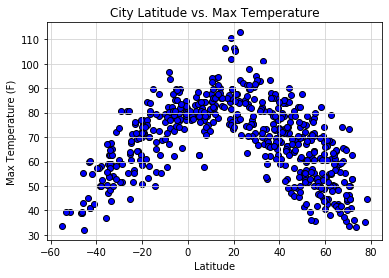

The code is analyzing and portraying the relationship between the citys latitude compared to its Max Temperature.


In [48]:
plt.scatter(city_df["Latitude"],city_df["Max Temp"],edgecolors="black",facecolors="blue")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b= True, which= "major", axis= "both", linestyle= "-", color= "lightgrey")

plt.savefig("CityLat vs MaxTemp.png")
plt.show()

#After each plot add a sentence or two explaining what the code is and analyzing.
print(f'The code is analyzing and portraying the relationship between the citys latitude compared to its Max Temperature.')

## Latitude vs. Humidity Plot

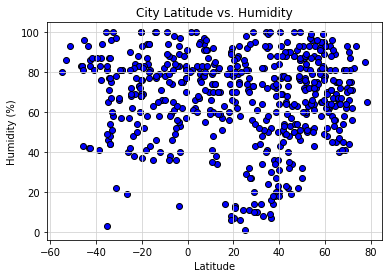

The code is analyzing and portraying the relationship between the citys latitude compared to its Humidity.


In [49]:
plt.scatter(city_df["Latitude"],city_df["Humidity"],edgecolors= "black",facecolors= "blue")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b= True, which= "major", axis= "both", linestyle= "-", color= "lightgrey")

plt.savefig("CityLat vs Humidity.png")
plt.show()

#After each plot add a sentence or two explaining what the code is and analyzing.
print(f'The code is analyzing and portraying the relationship between the citys latitude compared to its Humidity.')

## Latitude vs. Cloudiness Plot

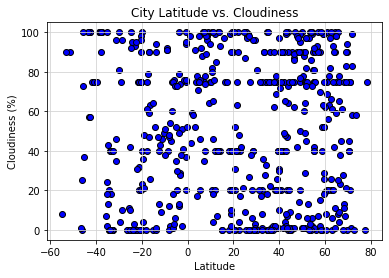

The code is analyzing and portraying the relationship between the citys latitude compared to cloudiness.


In [50]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness"],edgecolors= "black",facecolors= "blue")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b= True, which= "major", axis= "both", linestyle= "-", color= "lightgrey")

plt.savefig("CityLat vs Cloudiness.png")
plt.show()

#After each plot add a sentence or two explaining what the code is and analyzing.
print(f'The code is analyzing and portraying the relationship between the citys latitude compared to cloudiness.')

## Latitude vs. Wind Speed Plot

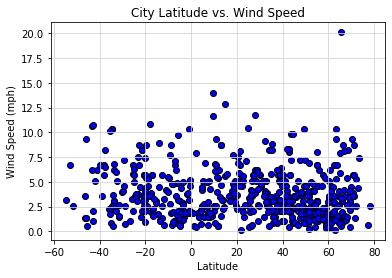

The code is analyzing and portraying the relationship between the citys latitude compared to its wind speed.


In [51]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"],edgecolors= "black",facecolors= "blue")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b= True, which= "major", axis= "both", linestyle= "-", color= "lightgrey")

plt.savefig("CityLat vs WindSpeed.png")
plt.show()

#After each plot add a sentence or two explaining what the code is and analyzing.
print(f'The code is analyzing and portraying the relationship between the citys latitude compared to its wind speed.')

## Linear Regression

In [61]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [62]:
# Create Northern and Southern Hemisphere DataFrames

northern_lat_df = city_df.loc[city_df["Latitude"] >= 0,:]
southern_lat_df = city_df.loc[city_df["Latitude"] < 0,:]

northern_lat_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Saskylakh,58,RU,1592502913,62,71.92,114.08,62.726,2.58
3,Baykit,63,RU,1592503158,62,61.67,96.37,54.788,1.57
4,Narsaq,75,GL,1592503174,70,60.92,-46.05,42.800,4.60
6,Scarborough,99,GB,1592503209,96,54.28,-0.40,57.002,0.45
7,Kampot,20,KH,1592503209,74,10.62,104.18,84.200,2.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7196086477461733


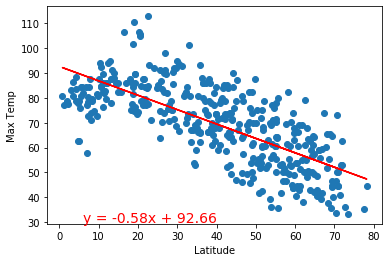

In [64]:
x_values = northern_lat_df["Latitude"]
y_values = northern_lat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

print("The r value shows a strong negative correlation between latitude and max temperature for the northern hemisphere.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7899902728165762


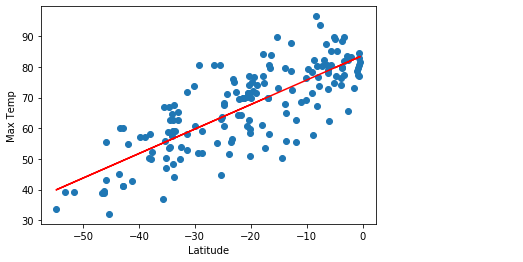

In [66]:
x_values = southern_lat_df["Latitude"]
y_values = southern_lat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

print("The r value shows a strong positive correlation between latitude and max temperature for the southern hemisphere.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05157601222425509


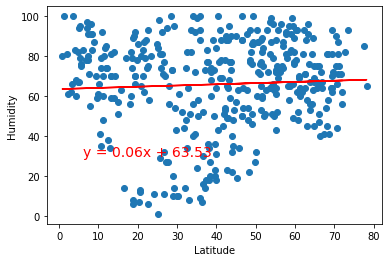

The r value shows a weak positive correlation between latitude and humidity for the northern hemisphere.


In [68]:
x_values = northern_lat_df["Latitude"]
y_values = northern_lat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

print("The r value shows a weak positive correlation between latitude and humidity for the northern hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.033872536476694665


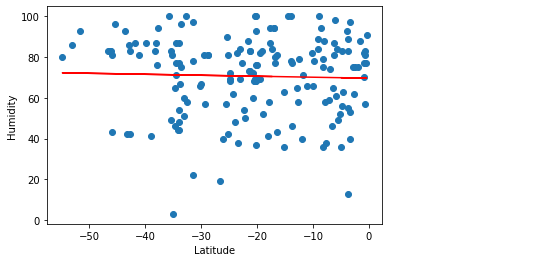

The r value shows a weak negative correlation between latitude and humidity for the southern hemisphere.


In [70]:
x_values = southern_lat_df["Latitude"]
y_values = southern_lat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

print("The r value shows a weak negative correlation between latitude and humidity for the southern hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.05939743871948242


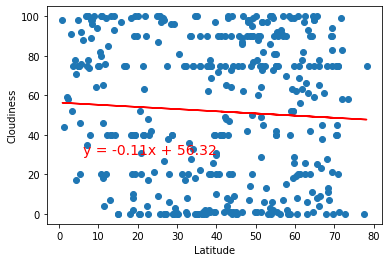

The r value shows a weak negative correlation between cloudiness and latitude for the northern hemisphere.


In [74]:
x_values = northern_lat_df["Latitude"]
y_values = northern_lat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

print("The r value shows a weak negative correlation between cloudiness and latitude for the northern hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00753359257752051


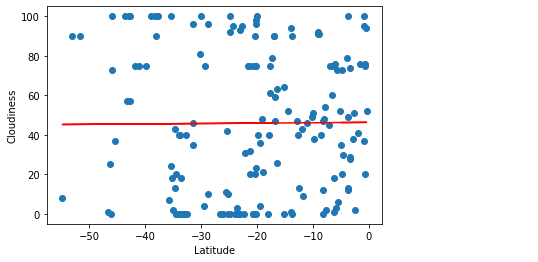

The r value shows a weak to no relationship between latitude and humidity for the southern hemisphere.


In [76]:
x_values = southern_lat_df["Latitude"]
y_values = southern_lat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

print("The r value shows a weak to no relationship between latitude and humidity for the southern hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07952393612942865


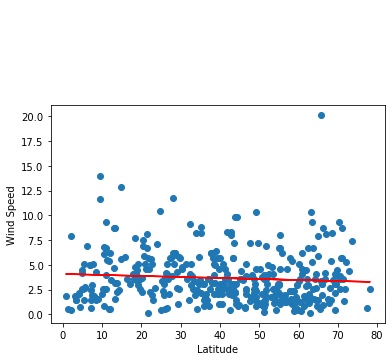

The r value shows a very weak negative relationship between wind speed and latitude for the northern hemisphere.


In [81]:
x_values = northern_lat_df["Latitude"]
y_values = northern_lat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

print("The r value shows a very weak negative relationship between wind speed and latitude for the northern hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14435245306960343


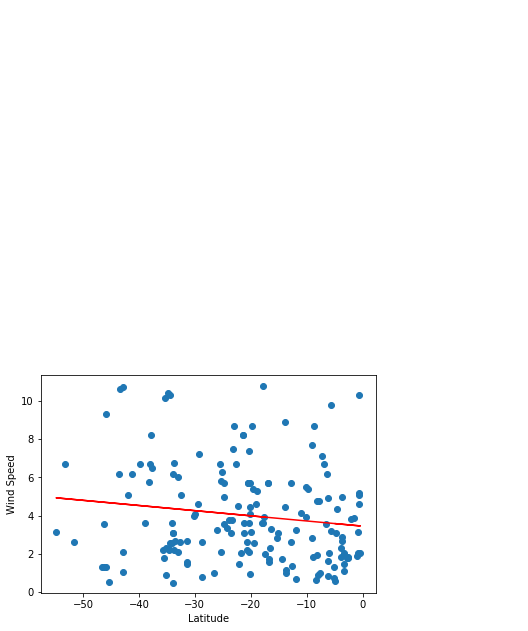

The r value shows a very weak negative relationship between wind speed and latitude for the southern hemisphere.


In [82]:
x_values = southern_lat_df["Latitude"]
y_values = southern_lat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

print("The r value shows a very weak negative relationship between wind speed and latitude for the southern hemisphere.")